In [2]:
#TASK A PART 1

import numpy as np
import matplotlib.pyplot as pl


def trapzedq(x,y):
    
    #Finding the number of nodes (n) and the subinrerval (h) (here assumed to be the same everywhere)
    n = len(x)
    h = x[1] - x[0]
    
    #Adding the first and last datapoints 
    integral = h * (y[0] / 2 + y[-1]/2)
    
    #Adding all other datapoints, (the sum part of the formula)
    for i in range(1,n-1):
        integral += h * y[i] #IMPORTANT NOTE: Here I multiply each value by h and thus open the bracket this is different from doing not openening the bracket and multiplying by h at the very end
        
    return integral


def f(x):
    y = 1/np.sqrt(x**18.10+2021)
    #y = np.sin(x)
    return y


#CALCULATING THE INTEGRAL FOR 5 NODES

#Defineing the x values
x1 = np.linspace(0,2,5)

#Finding the corresponding y values
y1 = []
for i in x1:
    y1.append(1/np.sqrt(i**18.10+2021))
    
I1 = trapzedq(x1,y1)
print(f"The integral with 5 nodes is {I1}")

#CALCULATING THE INTEGRAL FOR 11 NODES

#Defineing the x values
x2 = np.linspace(0,2,11)

#Finding the corresponding y values
y2 = []
for i in x2:
    y2.append(1/np.sqrt(i**18.10+2021))

I2 = trapzedq(x2,y2)
print(f"The integral with 11 nodes is {I2}")

        

The integral with 5 nodes is 0.03665242818148203
The integral with 11 nodes is 0.03645681455735674


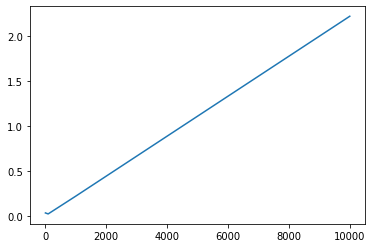

In [3]:
#TASK A PART 2

b = [10, 100, 1000, 10000]
I = []

for i in b:
    x = np.linspace(0, i, 51)
    y =[]
    for j in x:
        y.append(1/np.sqrt(j**18.10+2021))
    
    I.append(trapzedq(x,y))
    
pl.plot(b,I)



0.03728040807670104
0.03728040920057175
0.03728040920057175
0.03728040920057175


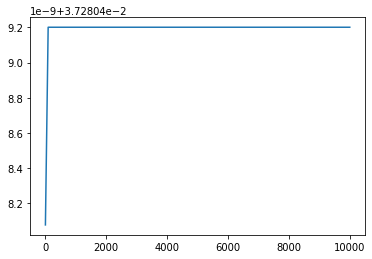

In [4]:
#TASK A PART 3

b = [10, 100, 1000, 10000]
I = []
h = 0.5

for i in b:
    x = np.arange(0, i+h, h)
    y = f(x)
    
    I += [trapzedq(x,y)]

pl.plot(b, I)
for i in I:
    print(i)


nan
nan
nan
nan


/Users/atihaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/atihaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


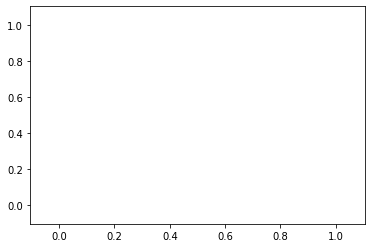

In [5]:
#TASK B PART 1

b = [10, 100, 1000, 10000]
I = []

for i in b:
    x = np.linspace(0, i, 51)
    y =[]
    for j in x:
        y.append(1/np.sqrt(j**18.10-2021))
    
    I.append(trapzedq(x,y))
    
pl.plot(b,I)


b = [10, 100, 1000, 10000]
I = []
h = 0.5

for i in b:
    x = np.arange(0, i+h, h)
    y =[]
    for j in x:
        y.append(1/np.sqrt(j**18.10-2021))
    
    I += [trapzedq(x,y)]

pl.plot(b, I)
for i in I:
    print(i)

In [6]:
#TASK C 

def trapz(x,y):
    
    #Finding the number of nodes (n) and the subinrerval (h) between each neighbouring nodes (Here the nodes might not be equidistant!!)
    n = len(x)
    h = []
    for i in range(n-1):
        h.append(x[i+1] - x[i]) 
        
    integral = 0
    
    for i in range(n-1):
        
        integral += ((y[i+1]+y[i]) * h[i]) / 2
        
    return integral



The river themes looks like this
The surface area of the water in the river Themes in km^2 is 12.125701354602992


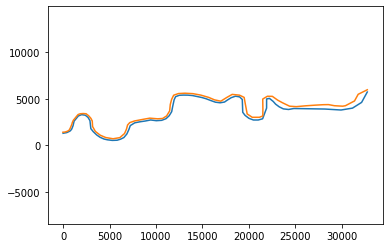

In [7]:
#TASK D

#READING IN EACH LINE INTO AN ARRAY
def ReadFileToArray (FileName):
    f = open(FileName, "r")
    FileArr = []
    for line in f:
        FileArr.append(float(line.rstrip()))
    f.close()
    return FileArr

xs = ReadFileToArray('xs.txt')
ys = ReadFileToArray('ys.txt')
xn = ReadFileToArray('xn.txt')
yn = ReadFileToArray('yn.txt')

print("The river themes looks like this")
pl.plot(xs,ys)
pl.plot(xn,yn)
pl.axis('equal')


#Compute the surface in the basin:

Area = trapz(xn,yn)-trapz(xs,ys)
print(f"The surface area of the water in the river Themes in km^2 is {Area/10**6}")

In [8]:
#TASK E THIS SOLUTION I THINK IS GOOD BUT WAAAY LESS EFFICIENT THAN THE ONE IN THE SOLUTIONS (will work well for high number of nodes but very slow and semi bad for low number of nodes)

#First creating the function that we will be integrating:
R = 5


x0 = np.arange(-R + 0.05, R , 0.005)
y0 = np.arange(-R+ 0.05, R , 0.005)

x = []
y = []
z = []

for i in range(len(x0)):
    z1 = []
    x1 = []
    y1 = []
    for j in range(len(y0)):
        if np.sqrt(x0[i]**2 + y0[j]**2) < R:
            x1.append(x0[i])
            y1.append(y0[j])
            #z1.append(np.sqrt(R - np.sqrt(x0[i] ** 2 + y0[j] ** 2)))
            z1.append(np.sqrt(R**2 - (x0[i] ** 2 + y0[j] ** 2)))
        else:
            x1.append(0)
            y1.append(0)
            z1.append(0)
    z.append(z1)
    x.append(x1)
    y.append(y1)


G =[]  
for i in range(int(len(x))):
    G.append(trapz(y[i],z[i]))

    
I = trapz(x0,G)

print(f"The volume of the dome (integral given by the two trapizeum rules is: {I} m^3")

# for an hemisphere the volume is:
print(f"The colume of a hemisphere for reference is {4/3*np.pi*R**3/2} m^3")




    

The volume of the dome (integral given by the two trapizeum rules is: 257.1239093316353 m^3
The colume of a hemisphere for reference is 261.79938779914943 m^3


In [10]:
#TASK E new improved solution:

def trapeziumRuleGeneral(x,y):
    
    #Finding the number of nodes (n) and the subinrerval (h) between each neighbouring nodes (Here the nodes might not be equidistant!!)
    n = len(x)
    h = []
    for i in range(n-1):
        h.append(x[i+1] - x[i]) 
        
    integral = 0
    
    for i in range(n-1):
        
        integral += ((y[i+1]+y[i]) * h[i]) / 2
        
        
    return integral

def trapeziumRuleDoubleIntegral(x_0, x_n, stepSizeXY):
    # set the x range, not including the boundaries
    x = np.arange(x_0 + stepSizeXY, x_n, stepSizeXY)
    N = len(x)
    # the y range depends of the various values of x, and cannot be fixed here
    
    # integrate in dy, for all the value of x, i.e. find G(x)
    
    G = np.zeros(N)
    # for every x
    for i in range(0,N):
        # determine the boundaries m and p for this x
        mx = np.sqrt(25-x[i]**2) # CHANGE THIS TO THE FUNCTION z(x,y) with y =0 !!!
        px = mx
        # set the y points for this x, not including the boundaries
        y = np.arange(-mx+stepSizeXY,px,stepSizeXY)
        z = np.zeros(len(y))
        # determine the values of the function z(x,y)
        for j in range(0,len(y)):
             z[j] = np.sqrt(25-x[i]**2-y[j]**2) # CHANGE THIS TO THE FUNCTION z(x,y) !!!!
        
        # integrate in dy from cx to dx (for this specific x)
        G[i] = trapeziumRuleGeneral(y,z) # G(x)
    
    # integrate G(x) in dx
    I = trapeziumRuleGeneral(x,G)
    return I


I = trapeziumRuleDoubleIntegral(-5,5, 0.05)
print(f"The volume of the dome (integral given by the two trapizeum rules is: {I} m^3")

# for an hemisphere the volume is:
print(f"The colume of a hemisphere for reference is {4/3*np.pi*R**3/2} m^3")



The volume of the dome (integral given by the two trapizeum rules is: 261.427850926935 m^3
The colume of a hemisphere for reference is 261.79938779914943 m^3
